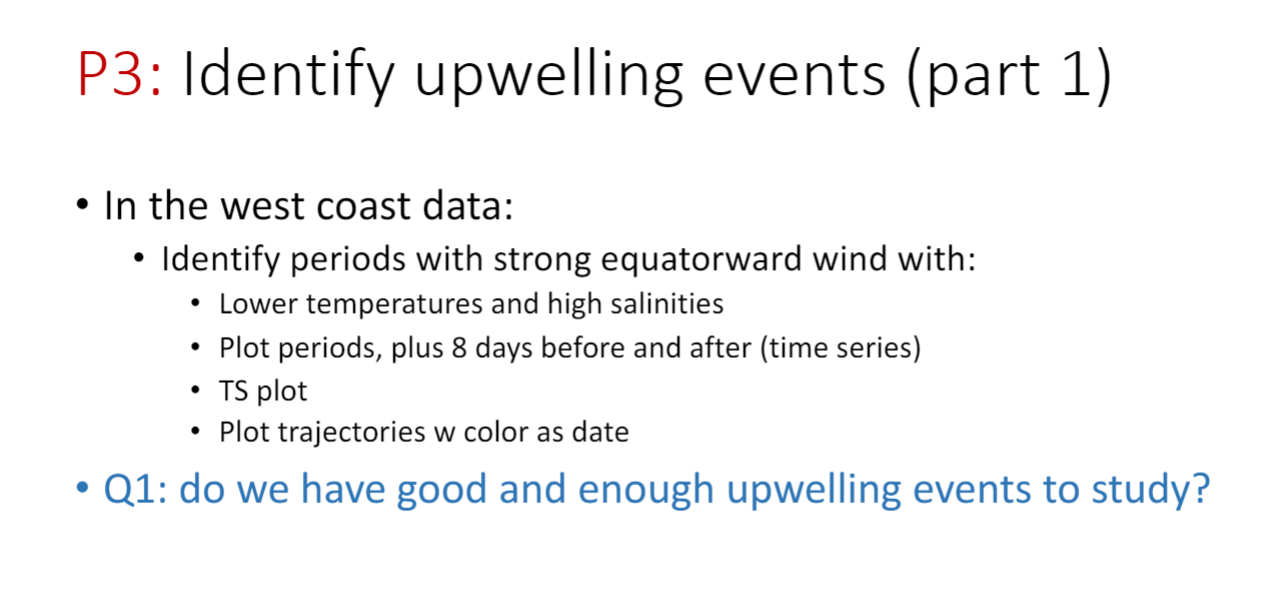

In [1]:
# import necessary packages
import numpy as np
import matplotlib.dates as mdates
import warnings


warnings.simplefilter('ignore')

# load custom packages
from trajectory_plot import trajectory_plot
from compile_function import Compile_Datasets

In [2]:


# fn_list1 = ['saildrone_west_coast_survey_2018_sd1026_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
#             'saildrone_west_coast_survey_2019_sd1047_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
#             'saildrone_west_coast_survey_2019_sd1043_JPLv5.0_8dy_20210613norep_20210613_20211116.nc']
# print(type(fn_list1))
# sail = Compile_Datasets(fn_list1)

sail = Compile_Datasets("all")



sail = sail.where((sail["lon"].values != np.nan) | (sail["lat"].values != np.nan) |
                  (sail["SAL_CTD_MEAN"] != np.nan) | (sail["TEMP_CTD_MEAN"] != np.nan) |
                  (sail["Delta_SAL_CTD_MEAN"] != np.nan) | (sail["Delta_TEMP_CTD_MEAN"] != np.nan), drop = True)



# print(np.nan in list(sail["lon"].values))
# print(np.nan in list(sail["lat"].values))
# print(np.nan in list(sail["SAL_CTD_MEAN"]))
# print(np.nan in list(sail["TEMP_CTD_MEAN"]))
# print(np.nan in list(sail["Delta_SAL_CTD_MEAN"]))
# print(np.nan in list(sail["Delta_TEMP_CTD_MEAN"]))

In [3]:
VWND_MEAN_Threshold = -5
Delta_TEMP_CTD_MEAN_Threshold = 1
Delta_SAL_CTD_MEAN_Threshold = 0.5


upwelling_data = sail.where((sail.VWND_MEAN < VWND_MEAN_Threshold) & (sail.Delta_TEMP_CTD_MEAN < Delta_TEMP_CTD_MEAN_Threshold) & 
                            (sail.Delta_SAL_CTD_MEAN > Delta_SAL_CTD_MEAN_Threshold))


# reformat dates
upwelling_data['date'] = mdates.date2num(upwelling_data['time'].dt.date)

# ask what variable should be plotted
print([i for i in upwelling_data.data_vars])


['lat', 'lon', 'TEMP_AIR_MEAN', 'RH_MEAN', 'BARO_PRES_MEAN', 'SAL_CTD_MEAN', 'TEMP_CTD_MEAN', 'TEMP_CTD_STDDEV', 'CDOM_MEAN', 'CHLOR_MEAN', 'PAR_AIR_MEAN', 'GUST_WND_MEAN', 'UWND_MEAN', 'VWND_MEAN', 'SOG_MEAN', 'COG_MEAN', 'HDG_MEAN', 'ROLL_MEAN', 'PITCH_MEAN', 'WWND_MEAN', 'TEMP_RBR_MEAN', 'SAL_RBR_MEAN', 'TEMP_O2_RBR_MEAN', 'CHLOR_WETLABS_MEAN', 'WIND_MEASUREMENT_HEIGHT_MEAN', 'sat_smap_sss', 'sat_anc_sss', 'sat_anc_sst', 'sat_smap_spd', 'sat_smap_high_spd', 'sat_weight', 'sat_land_fraction', 'sat_ice_fraction', 'sat_smap_sss_uncertainty', 'sat_lat', 'sat_lon', 'dist_land', 'analysed_sst', 'analysis_error', 'mask', 'sea_ice_fraction', 'relativeID', 'realID', 'duration', 'Delta_TEMP_CTD_MEAN', 'Delta_SAL_CTD_MEAN']


save attempt


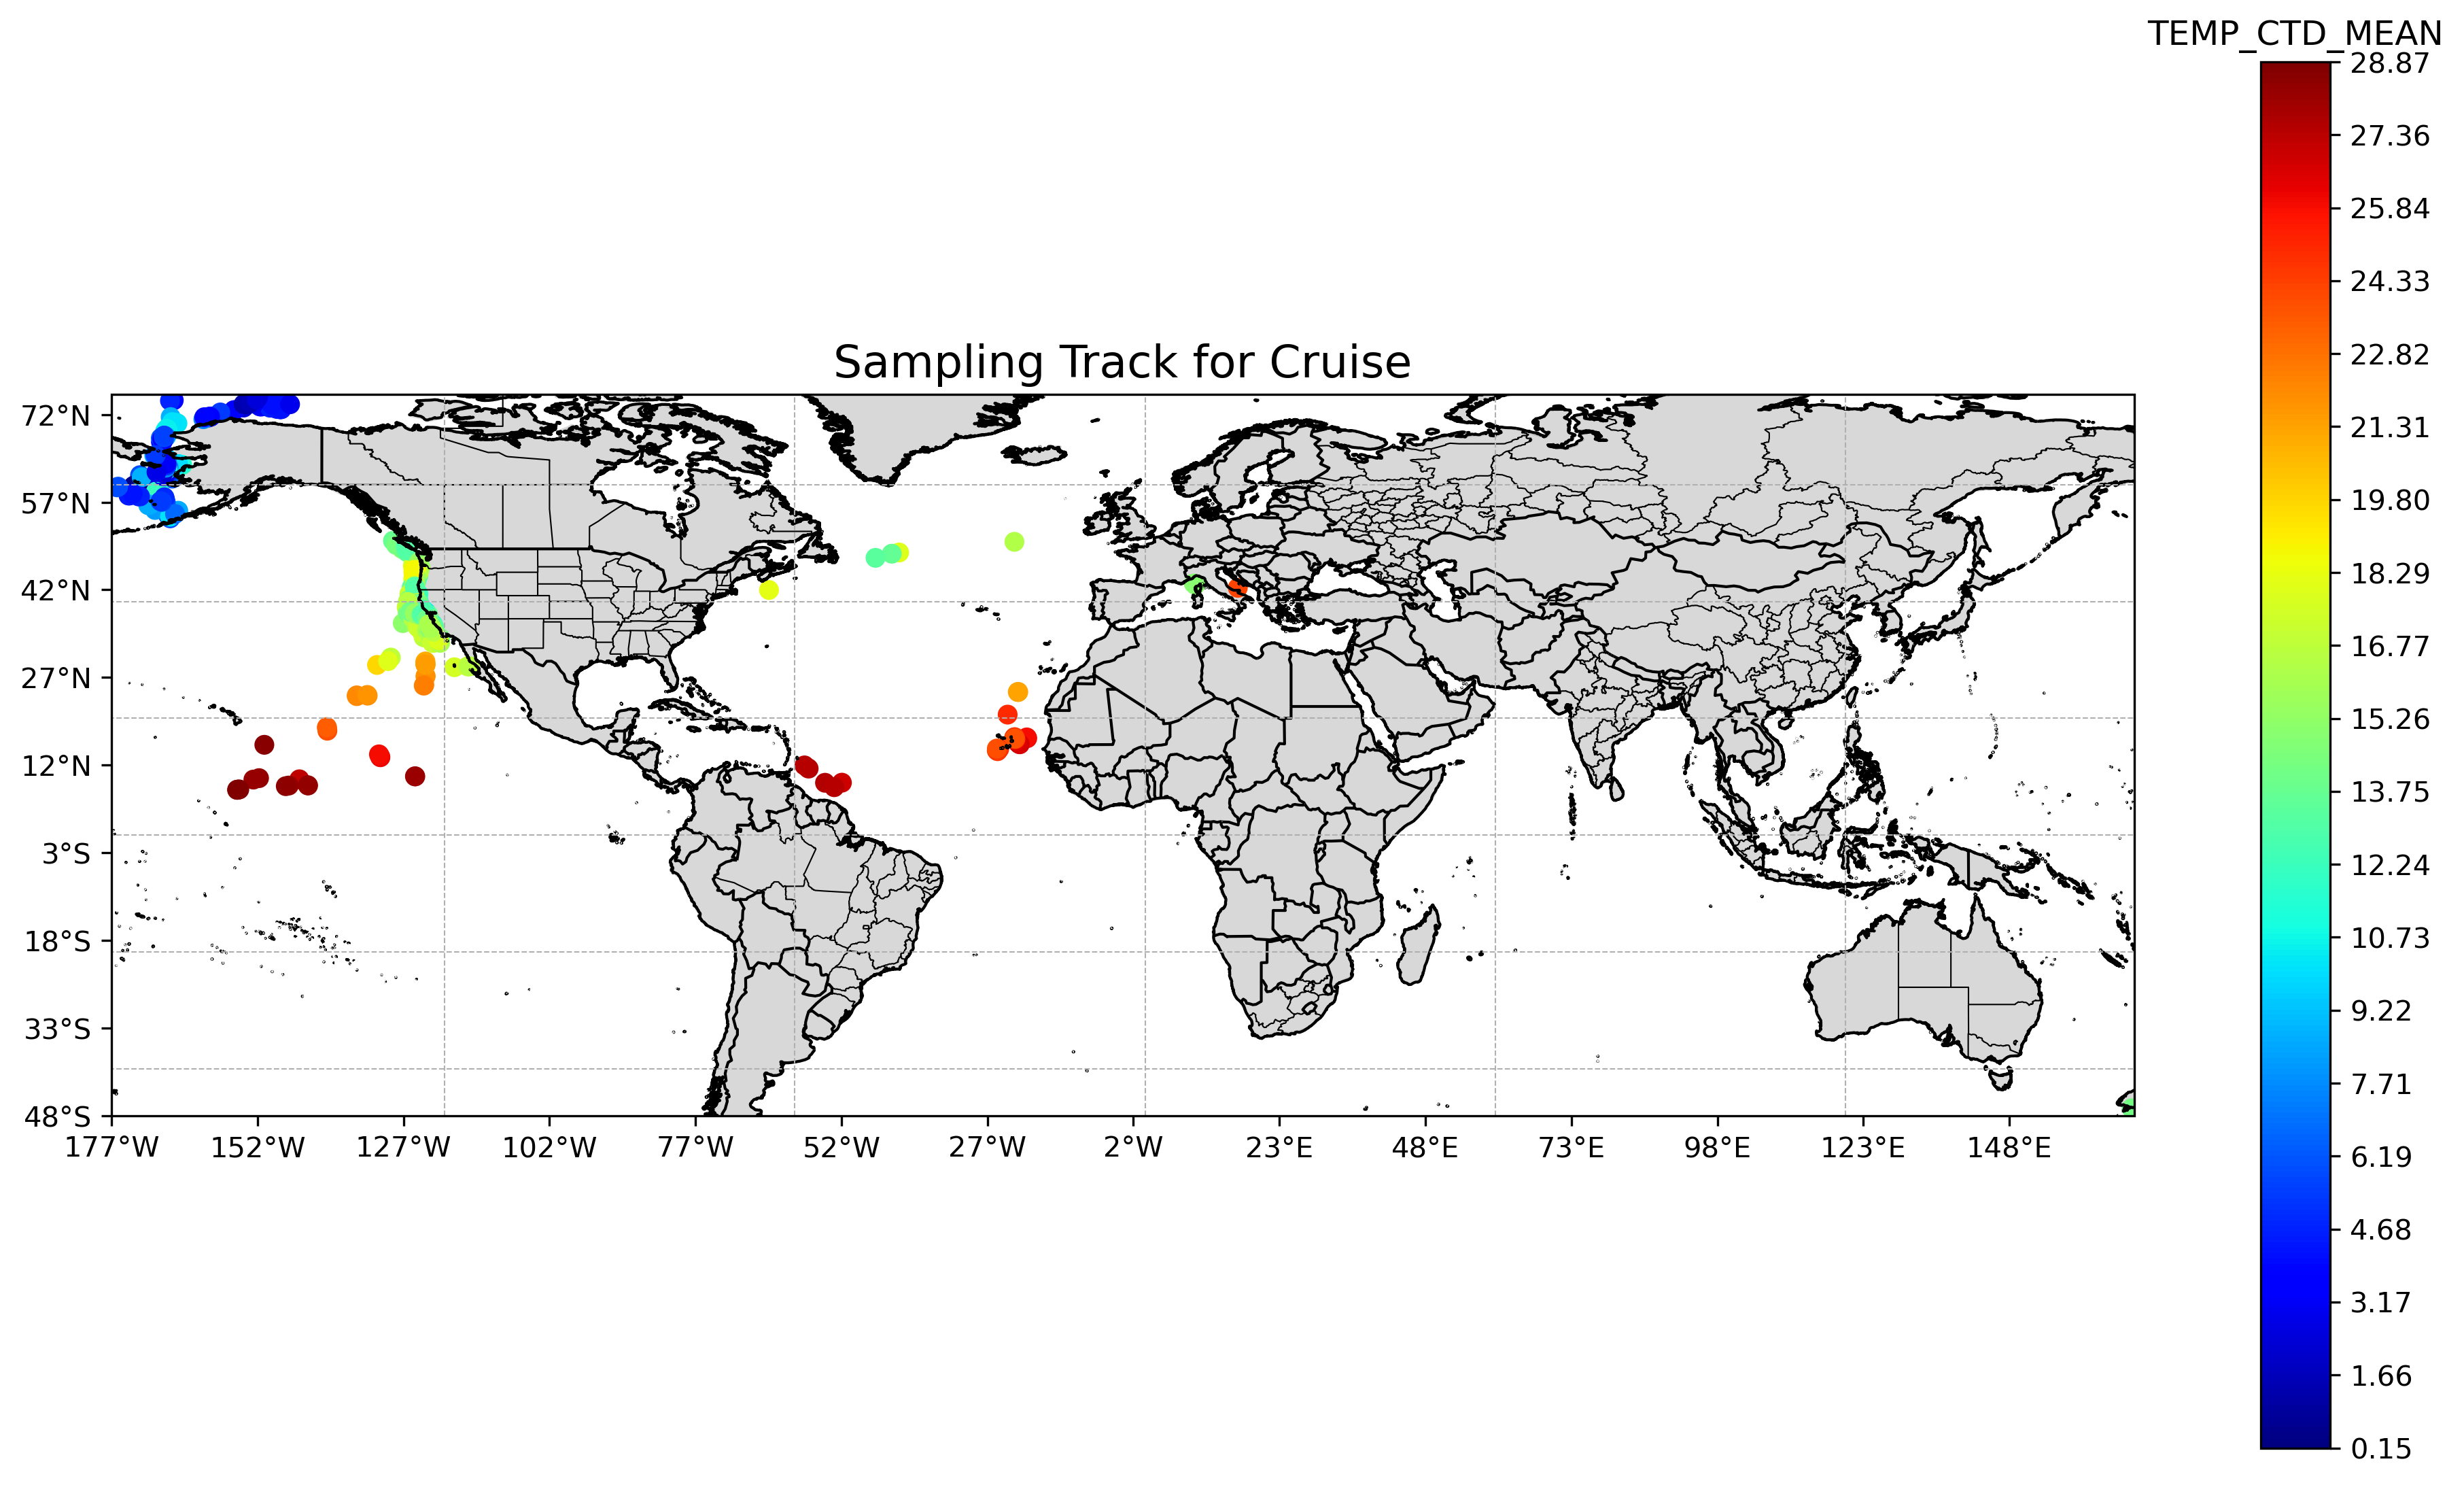

mogus


In [4]:
# var_to_plot=input('what variable should be plotted:')
var_to_plot = "TEMP_CTD_MEAN"

# plt.scatter(x=sail['lon'], y=sail['lat'], c=sail[var_to_plot], cmap='jet')

print(trajectory_plot(upwelling_data, var_to_plot, True, "Upwelling_event_chart_low_thresholds", 300))
